In [37]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
# Get the current working directory
current_directory = os.getcwd()
print("Current directory:", current_directory)

# List all files in the current directory
files_in_directory = os.listdir(current_directory)
print("Files in directory:", files_in_directory)

Current directory: f:\Data Science Materials\Github-Repos\ElectoralBonds_Case_Study
Files in directory: ['.git', '.gitattributes', 'Archive', 'Data_Set', 'ElectoralBonds_CaseStudy_Notebook.ipynb', 'README.md']


In [39]:
# Read the data from the first CSV file
Data_Part1 = pd.read_csv('Data_Set/Electoral_Bonds_Part_I.csv')

# Read the data from the second CSV file
Data_Part2 = pd.read_csv('Data_Set/Electoral_Bonds_Part_II.csv')

In [40]:
# Set display option to show all columns and adjust display width
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [41]:

# Display the first few rows of each dataframe
print("Data from Part I:")
print(Data_Part1.head())

print("\nData from Part II:")
print(Data_Part2.head())

Data from Part I:
  Date of Purchase       Purchaser Name  Denomination  Unnamed: 3
0      12/Apr/2019  A B C INDIA LIMITED        100000         NaN
1      12/Apr/2019  A B C INDIA LIMITED        100000         NaN
2      12/Apr/2019  A B C INDIA LIMITED       1000000         NaN
3      12/Apr/2019  A B C INDIA LIMITED       1000000         NaN
4      12/Apr/2019  A B C INDIA LIMITED        100000         NaN

Data from Part II:
  Date of\nEncashment               Name of the Political Party  Denomination  Unnamed: 3
0         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000         NaN
1         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000         NaN
2         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM      10000000         NaN
3         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000         NaN
4         12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000         NaN


In [42]:
# Convert "Date of Purchase" columns to datetime format
Data_Part1['Date of Purchase'] = pd.to_datetime(Data_Part1['Date of Purchase'], format='%d/%b/%Y')

# Change "Purchaser Name" columns to text
Data_Part1['Purchaser Name'] = Data_Part1['Purchaser Name'].astype(str)

# Convert the "Denomination" column to numbers
Data_Part1['Denomination'] = pd.to_numeric(Data_Part1['Denomination'])

# Display the updated DataFrame
print(Data_Part1)


      Date of Purchase                  Purchaser Name  Denomination  Unnamed: 3
0           2019-04-12             A B C INDIA LIMITED        100000         NaN
1           2019-04-12             A B C INDIA LIMITED        100000         NaN
2           2019-04-12             A B C INDIA LIMITED       1000000         NaN
3           2019-04-12             A B C INDIA LIMITED       1000000         NaN
4           2019-04-12             A B C INDIA LIMITED        100000         NaN
...                ...                             ...           ...         ...
18866       2024-01-11  WESTWELL GASES PRIVATE LIMITED      10000000         NaN
18867       2024-01-11  WESTWELL GASES PRIVATE LIMITED      10000000         NaN
18868       2024-01-11  WESTWELL GASES PRIVATE LIMITED      10000000         NaN
18869       2024-01-11  WESTWELL GASES PRIVATE LIMITED      10000000         NaN
18870       2024-01-11  WESTWELL GASES PRIVATE LIMITED      10000000         NaN

[18871 rows x 4 columns]


In [43]:
# Drop the column 'Unnamed: 3'
Data_Part1.drop(columns=['Unnamed: 3'], inplace=True)

# Display the updated DataFrame
print(Data_Part1)


      Date of Purchase                  Purchaser Name  Denomination
0           2019-04-12             A B C INDIA LIMITED        100000
1           2019-04-12             A B C INDIA LIMITED        100000
2           2019-04-12             A B C INDIA LIMITED       1000000
3           2019-04-12             A B C INDIA LIMITED       1000000
4           2019-04-12             A B C INDIA LIMITED        100000
...                ...                             ...           ...
18866       2024-01-11  WESTWELL GASES PRIVATE LIMITED      10000000
18867       2024-01-11  WESTWELL GASES PRIVATE LIMITED      10000000
18868       2024-01-11  WESTWELL GASES PRIVATE LIMITED      10000000
18869       2024-01-11  WESTWELL GASES PRIVATE LIMITED      10000000
18870       2024-01-11  WESTWELL GASES PRIVATE LIMITED      10000000

[18871 rows x 3 columns]


In [44]:
# Count the number of rows before removing any blank rows
initial_row_count = len(Data_Part1)

# Remove rows with any missing values (blanks)
Data_Part1.dropna(inplace=True)

# Count the number of rows after removing blank rows
final_row_count = len(Data_Part1)

# Display the initial and final row counts
print("Data_Part1 Initial Row Count:", initial_row_count)
print("Data_Part1 Final Row Count:", final_row_count)


Data_Part1 Initial Row Count: 18871
Data_Part1 Final Row Count: 18871


In [45]:
# Count rows by 'Purchaser' and 'Denomination'
Purchaser = Data_Part1.groupby(['Purchaser Name', 'Denomination']).size()

# Display the counts
print(Purchaser)


Purchaser Name                 Denomination
14 REELS PLUS LLP              10000000         1
A B C INDIA LIMITED            100000          10
                               1000000          3
AAKANKSHA BAHETY               1000000          1
AALAYA CONSTRUCTIONS           10000000         1
                                               ..
YUVAN TRADING CONSULTANCY LLP  10000000         5
ZENSAR TECHNOLOGIES LTD        10000000         3
ZUVAN ENERGY PRIVATE LIMITED   10000000         1
ZUVAN ENERGY PVT LTD           10000000         2
ZYDUS HEALTHCARE LIMITED       10000000        29
Length: 1736, dtype: int64


In [46]:
# # Group data by 'Purchaser Name' and 'Denomination' and count rows
# purchaser_counts = Data_Part1.groupby(['Purchaser Name', 'Denomination']).size().reset_index(name='Count')

# # Create a bar plot
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Purchaser Name', y='Count', hue='Denomination', data=purchaser_counts)
# plt.title('Count of Purchases by Purchaser and Denomination')
# plt.xlabel('Purchaser Name')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.legend(title='Denomination')
# plt.show()


In [47]:
# Sum the 'Denomination' by 'Purchaser Name'
total_denomination_by_purchaser = Data_Part1.groupby('Purchaser Name')['Denomination'].sum().reset_index(name='Total Denomination')

# Convert 'Total Denomination' to crores
total_denomination_by_purchaser['Total Denomination (Cr)'] = total_denomination_by_purchaser['Total Denomination'] / 1e7

# Sort the result by 'Total Denomination' in descending order
total_denomination_by_purchaser = total_denomination_by_purchaser.sort_values(by='Total Denomination', ascending=False)

# Display the result
print(total_denomination_by_purchaser)


                                      Purchaser Name  Total Denomination  Total Denomination (Cr)
354              FUTURE GAMING AND HOTEL SERVICES PR         12080000000                1208.0000
652   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED          8210000000                 821.0000
866                    QWIKSUPPLYCHAINPRIVATELIMITED          4100000000                 410.0000
417                            HALDIA ENERGY LIMITED          3770000000                 377.0000
1248                                 VEDANTA LIMITED          3756500000                 375.6500
...                                              ...                 ...                      ...
814                                   POONAM AGARWAL                1000                   0.0001
579                                      KUNAL GUPTA                1000                   0.0001
718                                    N RAMAMOORTHY                1000                   0.0001
73                  

In [48]:
total_denomination_by_purchaser.head(20)

,Purchaser Name,Total Denomination,Total Denomination (Cr)
354,FUTURE GAMING AND HOTEL SERVICES PR,12080000000,1208.00
652,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,8210000000,821.00
866,QWIKSUPPLYCHAINPRIVATELIMITED,4100000000,410.00
417,HALDIA ENERGY LIMITED,3770000000,377.00
1248,VEDANTA LIMITED,3756500000,375.65
334,ESSEL MINING AND INDS LTD,2245000000,224.50
1299,WESTERN UP POWER TRANSMISSION COMPANY LI MITED,2200000000,220.00
556,KEVENTER FOODPARK INFRA LIMITED,1950000000,195.00
619,MADANLAL LTD.,1855000000,185.50
174,BHARTI AIRTEL LIMITED,1830000000,183.00


In [49]:
# Create a bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Total Denomination', y='Purchaser Name', data=top_20_purchasers, palette='viridis')
plt.title('Top 20 Purchasers by Total Denomination')
plt.xlabel('Total Denomination (Cr)')
plt.ylabel('Purchaser Name')

# Convert x-axis ticks to display in crores
plt.xticks(ticks=barplot.get_xticks(), labels=[f'{tick / 1e7:.2f} Cr' for tick in barplot.get_xticks()])

plt.tight_layout()
plt.show()


NameError: name 'top_20_purchasers' is not defined

<Figure size 864x576 with 0 Axes>

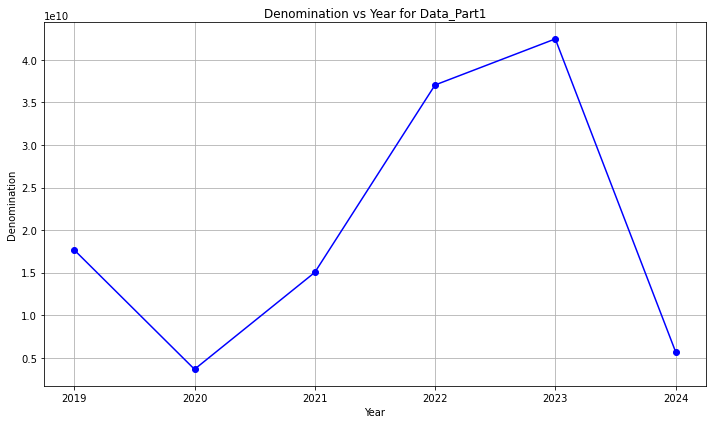

In [50]:
# Convert "Date of Purchase" to datetime
Data_Part1['Date of Purchase'] = pd.to_datetime(Data_Part1['Date of Purchase'], format='%d/%b/%Y')

# Extract year from the date
Data_Part1['Year'] = Data_Part1['Date of Purchase'].dt.year

# Group by year and sum the denominations
denomination_by_year = Data_Part1.groupby('Year')['Denomination'].sum()

# Plot the time series
plt.figure(figsize=(10, 6))
denomination_by_year.plot(marker='o', linestyle='-', color='b')
plt.title('Denomination vs Year for Data_Part1')
plt.xlabel('Year')
plt.ylabel('Denomination')
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
Data_Part2 = Data_Part2.rename(columns={'Date of\nEncashment': 'Date of Encashment'})

# Convert "Date of Encashment" column to datetime format
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Change "Name of the Political Party" columns to text
Data_Part2['Name of the Political Party'] = Data_Part2['Name of the Political Party'].astype(str)

# Convert the "Denomination" column to numbers
Data_Part2['Denomination'] = pd.to_numeric(Data_Part2['Denomination'])

# Display the updated DataFrame
print(Data_Part2)


      Date of Encashment               Name of the Political Party  Denomination  Unnamed: 3
0             2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000         NaN
1             2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000         NaN
2             2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM      10000000         NaN
3             2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000         NaN
4             2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000         NaN
...                  ...                                       ...           ...         ...
20416         2024-01-24                            JANASENA PARTY       1000000         NaN
20417         2024-01-24                            JANASENA PARTY       1000000         NaN
20418         2024-01-24                            JANASENA PARTY       1000000         NaN
20419         2024-01-24                            JANASENA PARTY    

In [52]:
# Drop the column 'Unnamed: 3'
Data_Part2.drop(columns=['Unnamed: 3'], inplace=True)

# Display the updated DataFrame
print(Data_Part2)


      Date of Encashment               Name of the Political Party  Denomination
0             2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000
1             2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000
2             2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM      10000000
3             2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000
4             2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000
...                  ...                                       ...           ...
20416         2024-01-24                            JANASENA PARTY       1000000
20417         2024-01-24                            JANASENA PARTY       1000000
20418         2024-01-24                            JANASENA PARTY       1000000
20419         2024-01-24                            JANASENA PARTY       1000000
20420         2024-01-24                            JANASENA PARTY       1000000

[20421 rows x 3 columns]


In [53]:
# Count the number of rows before removing any blank rows
initial_row_count = len(Data_Part2)

# Remove rows with any missing values (blanks)
Data_Part2.dropna(inplace=True)

# Count the number of rows after removing blank rows
final_row_count = len(Data_Part2)

# Display the initial and final row counts
print("Data_Part2 Initial Row Count:", initial_row_count)
print("Data_Part2 Final Row Count:", final_row_count)


Data_Part2 Initial Row Count: 20421
Data_Part2 Final Row Count: 20421


In [54]:
# Sum the 'Denomination' by 'Name of the Political Party'
total_denomination_to_party = Data_Part2.groupby('Name of the Political Party')['Denomination'].sum().reset_index(name='Total Denomination')

# Convert 'Total Denomination' to crores
total_denomination_to_party['Total Denomination (Cr)'] = total_denomination_to_party['Total Denomination'] / 1e7

# Sort the result by 'Total Denomination' in descending order
total_denomination_to_party = total_denomination_to_party.sort_values(by='Total Denomination', ascending=False)

# Display the result
print(total_denomination_to_party)


                       Name of the Political Party  Total Denomination  Total Denomination (Cr)
5                             BHARTIYA JANTA PARTY         60605111000                6060.5111
3                     ALL INDIA TRINAMOOL CONGRESS         16095314000                1609.5314
17         PRESIDENT, ALL INDIA CONGRESS COMMITTEE         14218655000                1421.8655
4                           BHARAT RASHTRA SAMITHI         12147099000                1214.7099
7                                  BIJU JANATA DAL          7755000000                 775.5000
8                          DMK PARTY IN PARLIAMENT          6390000000                 639.0000
26          YSR CONGRESS PARTY (YUVAJANA SRAMIKA R          3370000000                 337.0000
25                              TELUGU DESAM PARTY          2188800000                 218.8800
22                      SHIVSENA (POLITICAL PARTY)          1583814000                 158.3814
19                              RASTRIYA

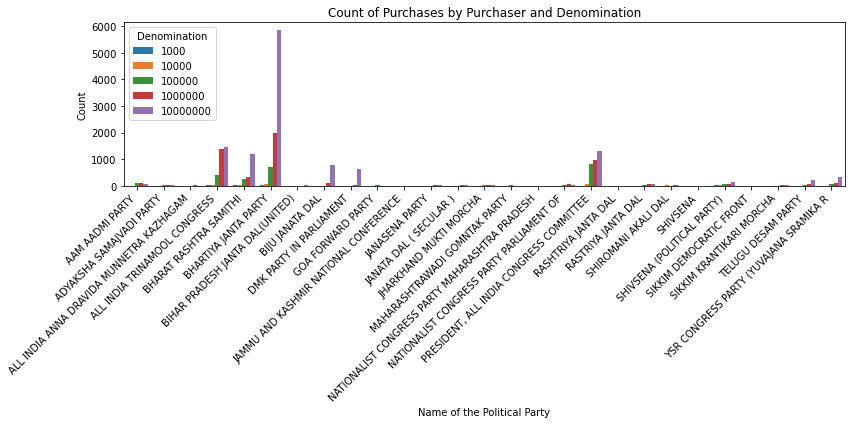

In [55]:
# Group data by 'Name of the Political Party' and 'Denomination' and count rows
party_counts = Data_Part2.groupby(['Name of the Political Party', 'Denomination']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Name of the Political Party', y='Count', hue='Denomination', data=party_counts)
plt.title('Count of Purchases by Purchaser and Denomination')
plt.xlabel('Name of the Political Party')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Denomination')
plt.show()


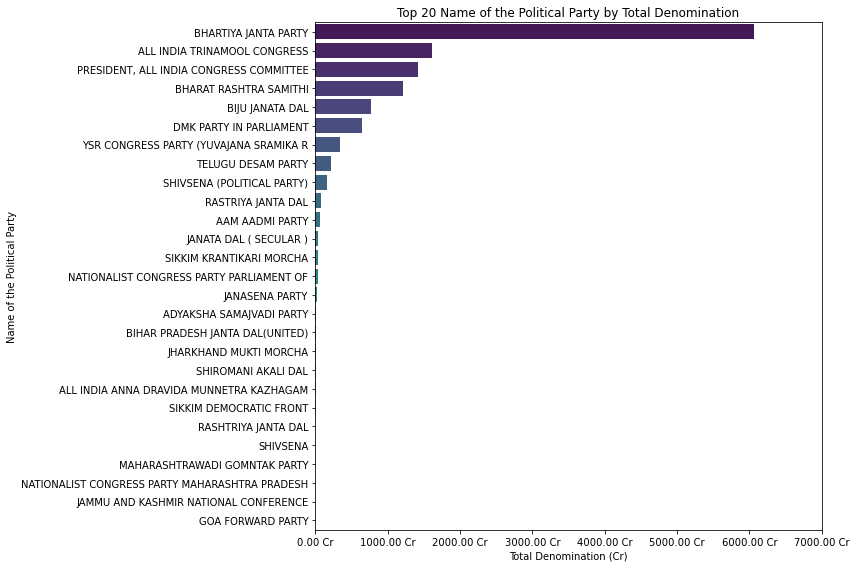

In [56]:
# Create a bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Total Denomination', y='Name of the Political Party', data=total_denomination_to_party, palette='viridis')
plt.title('Top 20 Name of the Political Party by Total Denomination')
plt.xlabel('Total Denomination (Cr)')
plt.ylabel('Name of the Political Party')

# Convert x-axis ticks to display in crores
plt.xticks(ticks=barplot.get_xticks(), labels=[f'{tick / 1e7:.2f} Cr' for tick in barplot.get_xticks()])

plt.tight_layout()
plt.show()


In [57]:
total_denomination_to_party.head(20)

,Name of the Political Party,Total Denomination,Total Denomination (Cr)
5,BHARTIYA JANTA PARTY,60605111000,6060.5111
3,ALL INDIA TRINAMOOL CONGRESS,16095314000,1609.5314
17,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",14218655000,1421.8655
4,BHARAT RASHTRA SAMITHI,12147099000,1214.7099
7,BIJU JANATA DAL,7755000000,775.5000
8,DMK PARTY IN PARLIAMENT,6390000000,639.0000
26,YSR CONGRESS PARTY (YUVAJANA SRAMIKA R,3370000000,337.0000
25,TELUGU DESAM PARTY,2188800000,218.8800
22,SHIVSENA (POLITICAL PARTY),1583814000,158.3814
19,RASTRIYA JANTA DAL,725000000,72.5000


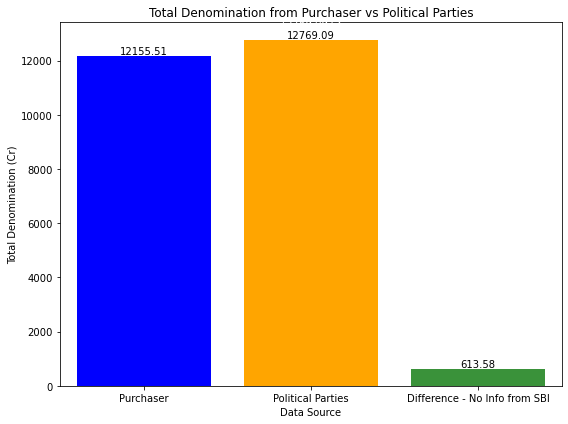

In [58]:
# Sum the 'Denomination' from Data_Part1
total_denomination_data1 = Data_Part1['Denomination'].sum() / 1e7  # Convert to crores

# Sum the 'Denomination' from Data_Part2
total_denomination_data2 = Data_Part2['Denomination'].sum() / 1e7  # Convert to crores

# Subtract the values of Data_Part1 from Data_Part2
total_denomination_difference = total_denomination_data2 - total_denomination_data1

# Create a DataFrame to hold the combined data
combined_data = pd.DataFrame({
    'Data Source': ['Purchaser', 'Political Parties','Difference - No Info from SBI'],
    'Total Denomination (Cr)': [total_denomination_data1, total_denomination_data2,total_denomination_difference]
})

# Plot the combined data vertically
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Data Source', y='Total Denomination (Cr)', data=combined_data)
plt.ylabel('Total Denomination (Cr)')
plt.xlabel('Data Source')
plt.title('Total Denomination from Purchaser vs Political Parties')

# Define the color for each bar
bar_colors = ['blue', 'orange']

# Add values inside the bars with different colors
for index, row in combined_data.iterrows():
    value_str = f'{row["Total Denomination (Cr)"]:.2f} Cr'
    count_str = f'Count: {len(Data_Part1) if index == 0 else len(Data_Part2)}'
    text_str = f'{value_str}\n{count_str}'
    barplot.text(index, row['Total Denomination (Cr)'], text_str, color='white', ha='center', va='bottom')

# Set different colors for each bar
for bar, color in zip(barplot.patches, bar_colors):
    bar.set_facecolor(color)

# Add values inside the bars
for index, row in combined_data.iterrows():
    barplot.text(index, row['Total Denomination (Cr)'], f'{row["Total Denomination (Cr)"]:.2f}', color='black', ha='center', va='bottom')


plt.tight_layout()
plt.show()


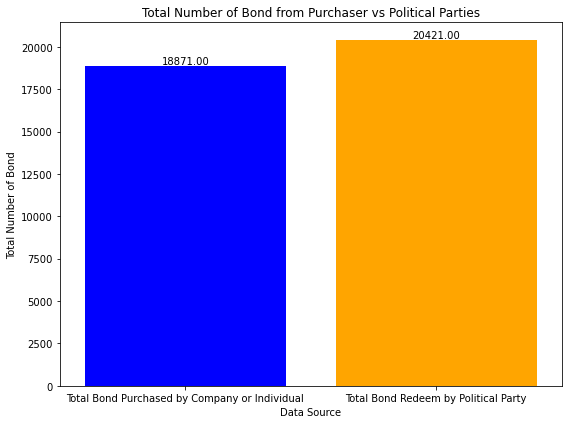

In [59]:
# Count the total number of rows in Data_Part1
total_rows_data1 = len(Data_Part1)

# Count the total number of rows in Data_Part2
total_rows_data2 = len(Data_Part2)

# Create a DataFrame to hold the combined data
combined_data = pd.DataFrame({
    'Data Source': ['Total Bond Purchased by Company or Individual', 'Total Bond Redeem by Political Party'],
    'Total Number of Rows': [total_rows_data1, total_rows_data2]
})

# Plot the combined data vertically
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Data Source', y='Total Number of Rows', data=combined_data)
plt.ylabel('Total Number of Bond')
plt.xlabel('Data Source')
plt.title('Total Number of Bond from Purchaser vs Political Parties')

# Add total number of rows inside the bars
for index, row in combined_data.iterrows():
    count_str = f'Count: {row["Total Number of Rows"]}'
    barplot.text(index, row['Total Number of Rows'], count_str, color='white', ha='center', va='bottom')

# Set different colors for each bar
for bar, color in zip(barplot.patches, bar_colors):
    bar.set_facecolor(color)

# Add values inside the bars
for index, row in combined_data.iterrows():
    barplot.text(index, row['Total Number of Rows'], f'{row["Total Number of Rows"]:.2f}', color='black', ha='center', va='bottom')


plt.tight_layout()
plt.show()


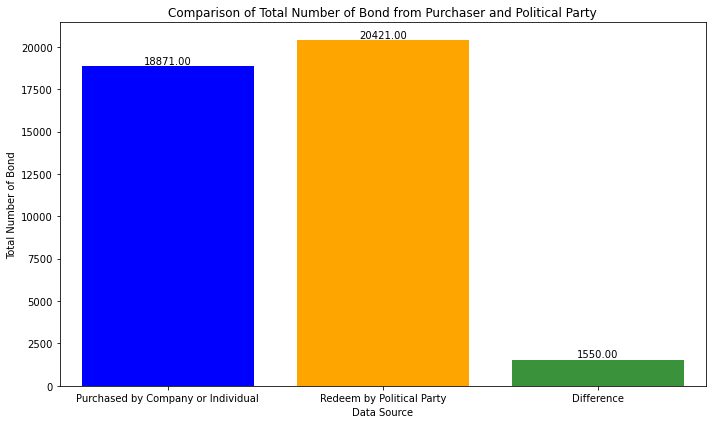

In [60]:
# Count the total number of rows in Data_Part1
total_rows_data1 = len(Data_Part1)

# Count the total number of rows in Data_Part2
total_rows_data2 = len(Data_Part2)

# Subtract the values of Data_Part1 from Data_Part2
total_rows_difference = total_rows_data2 - total_rows_data1

# Create a DataFrame to hold the combined data
combined_data = pd.DataFrame({
    'Data Source': ['Purchased by Company or Individual', 'Redeem by Political Party', 'Difference'],
    'Total Number of Rows': [total_rows_data1, total_rows_data2, total_rows_difference]

})

# Plot the combined data vertically
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Data Source', y='Total Number of Rows', data=combined_data)
plt.ylabel('Total Number of Bond')
plt.xlabel('Data Source')
plt.title('Comparison of Total Number of Bond from Purchaser and Political Party')

# Add total number of rows inside the bars
for index, row in combined_data.iterrows():
    count_str = f'Count: {row["Total Number of Rows"]}'
    barplot.text(index, row['Total Number of Rows'], count_str, color='white', ha='center', va='bottom')
# Set different colors for each bar
for bar, color in zip(barplot.patches, bar_colors):
    bar.set_facecolor(color)

# Add values inside the bars
for index, row in combined_data.iterrows():
    barplot.text(index, row['Total Number of Rows'], f'{row["Total Number of Rows"]:.2f}', color='black', ha='center', va='bottom')

plt.tight_layout()
plt.show()


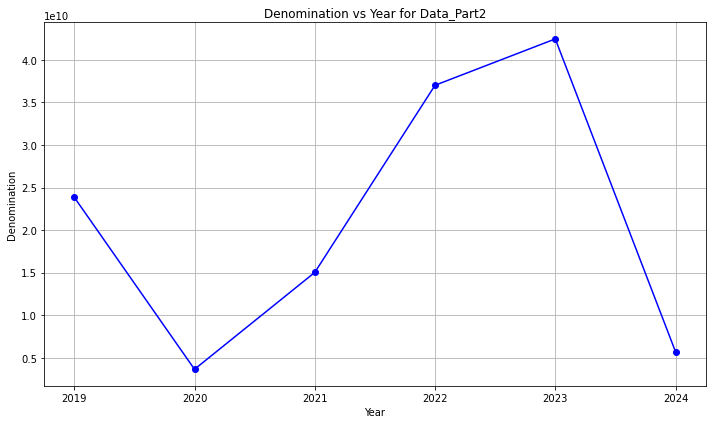

In [61]:
# Convert "Date of Encashment" to datetime
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Extract year from the date
Data_Part2['Year'] = Data_Part2['Date of Encashment'].dt.year

# Group by year and sum the denominations
denomination_by_year = Data_Part2.groupby('Year')['Denomination'].sum()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(denomination_by_year.index, denomination_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Denomination vs Year for Data_Part2')
plt.xlabel('Year')
plt.ylabel('Denomination')
plt.grid(True)
plt.tight_layout()
plt.show()



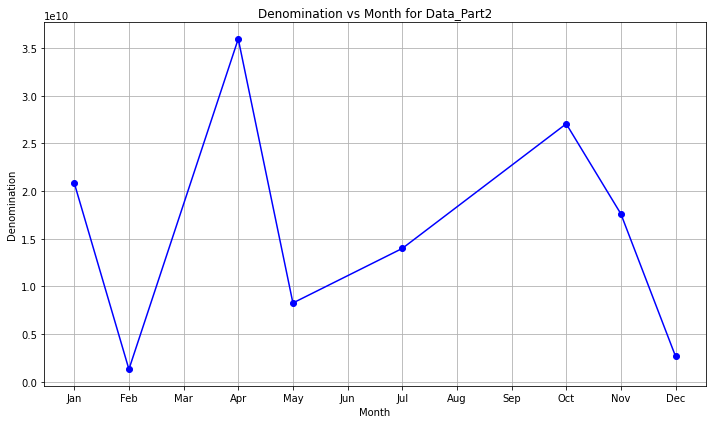

In [62]:
# Convert "Date of Encashment" to datetime
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Extract month from the date
Data_Part2['Month'] = Data_Part2['Date of Encashment'].dt.month

# Group by month and sum the denominations
denomination_by_month = Data_Part2.groupby('Month')['Denomination'].sum()

# Plot the time series
plt.figure(figsize=(10, 6))
denomination_by_month.plot(marker='o', linestyle='-', color='b')
plt.title('Denomination vs Month for Data_Part2')
plt.xlabel('Month')
plt.ylabel('Denomination')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()


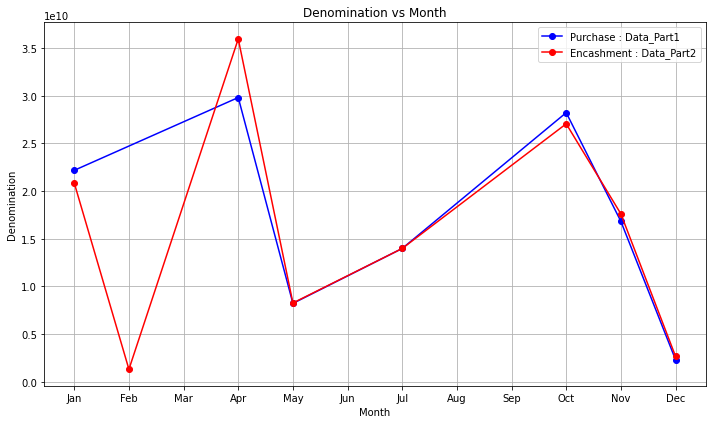

In [63]:
# Convert "Date of Purchase" and "Date of Encashment" to datetime
Data_Part1['Date of Purchase'] = pd.to_datetime(Data_Part1['Date of Purchase'], format='%d/%b/%Y')
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Find the earliest year present in both datasets
initial_year_data1 = Data_Part1['Date of Purchase'].dt.year.min()
initial_year_data2 = Data_Part2['Date of Encashment'].dt.year.min()
initial_year = min(initial_year_data1, initial_year_data2)

# Filter the data based on the initial year
Data_Part1_filtered = Data_Part1[Data_Part1['Date of Purchase'].dt.year >= initial_year]
Data_Part2_filtered = Data_Part2[Data_Part2['Date of Encashment'].dt.year >= initial_year]

# Extract month from the date for both datasets
Data_Part1_filtered['Month'] = Data_Part1_filtered['Date of Purchase'].dt.month
Data_Part2_filtered['Month'] = Data_Part2_filtered['Date of Encashment'].dt.month

# Group by month and sum the denominations for both datasets
denomination_by_month_data1 = Data_Part1_filtered.groupby('Month')['Denomination'].sum()
denomination_by_month_data2 = Data_Part2_filtered.groupby('Month')['Denomination'].sum()

# Plot the time series for both datasets
plt.figure(figsize=(10, 6))
plt.plot(denomination_by_month_data1.index, denomination_by_month_data1.values, marker='o', linestyle='-', color='b', label='Purchase : Data_Part1')
plt.plot(denomination_by_month_data2.index, denomination_by_month_data2.values, marker='o', linestyle='-', color='r', label='Encashment : Data_Part2')
plt.title('Denomination vs Month')
plt.xlabel('Month')
plt.ylabel('Denomination')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


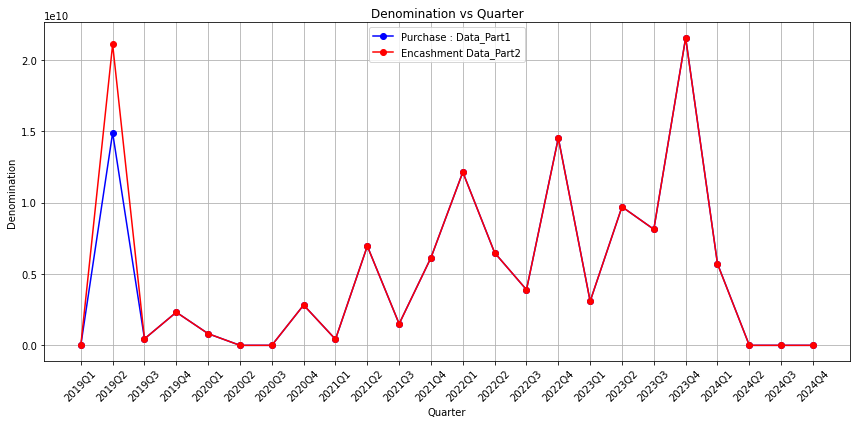

In [64]:
# Convert "Date of Purchase" and "Date of Encashment" to datetime
Data_Part1['Date of Purchase'] = pd.to_datetime(Data_Part1['Date of Purchase'], format='%d/%b/%Y')
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Extract quarter and year from the date for both datasets
Data_Part1['Quarter'] = Data_Part1['Date of Purchase'].dt.to_period('Q')
Data_Part2['Quarter'] = Data_Part2['Date of Encashment'].dt.to_period('Q')

# Group by quarter and sum the denominations for both datasets
denomination_by_quarter_data1 = Data_Part1.groupby('Quarter')['Denomination'].sum()
denomination_by_quarter_data2 = Data_Part2.groupby('Quarter')['Denomination'].sum()

# Create a range of quarters from 2019 Q1 to 2024 Q4
quarters_range = pd.period_range(start='2019Q1', end='2024Q4', freq='Q')

# Fill missing quarters with 0 denominations
denomination_by_quarter_data1 = denomination_by_quarter_data1.reindex(quarters_range, fill_value=0)
denomination_by_quarter_data2 = denomination_by_quarter_data2.reindex(quarters_range, fill_value=0)

# Plot the time series for both datasets
plt.figure(figsize=(12, 6))
plt.plot(denomination_by_quarter_data1.index.astype(str), denomination_by_quarter_data1.values, marker='o', linestyle='-', color='b', label='Purchase : Data_Part1')
plt.plot(denomination_by_quarter_data2.index.astype(str), denomination_by_quarter_data2.values, marker='o', linestyle='-', color='r', label='Encashment Data_Part2')
plt.title('Denomination vs Quarter')
plt.xlabel('Quarter')
plt.ylabel('Denomination')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


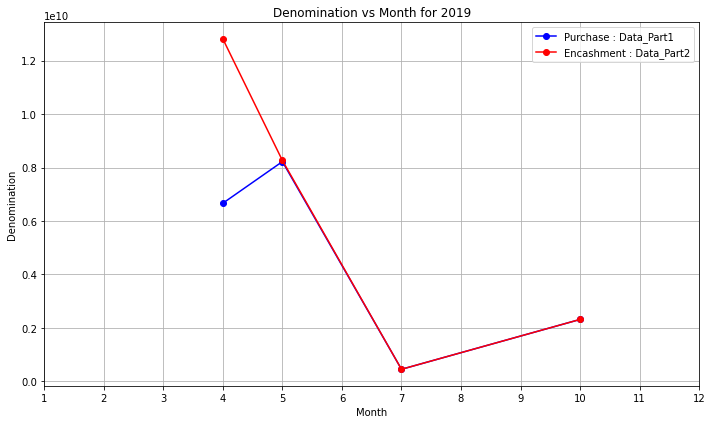

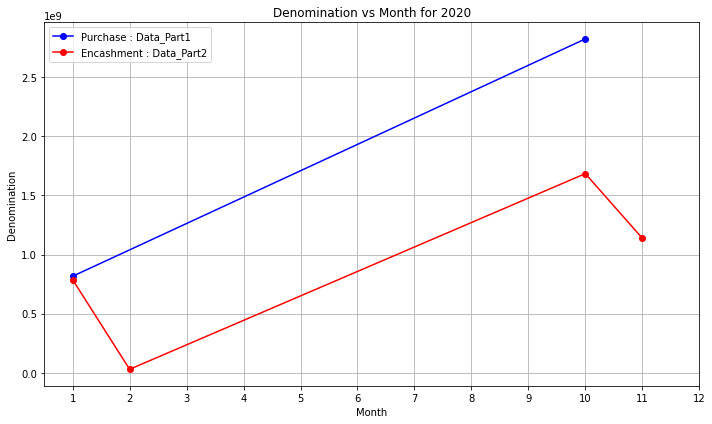

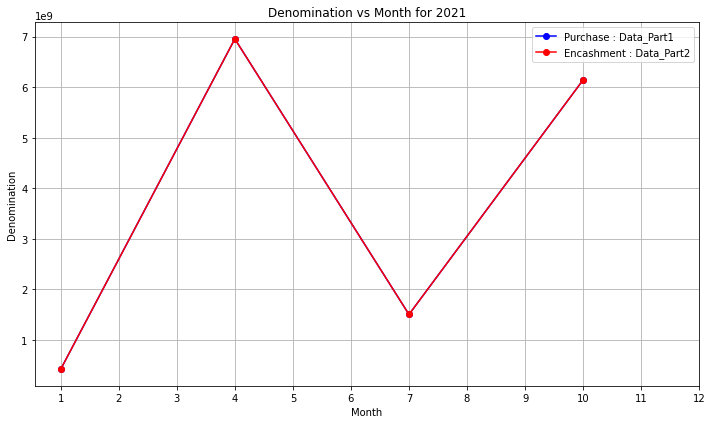

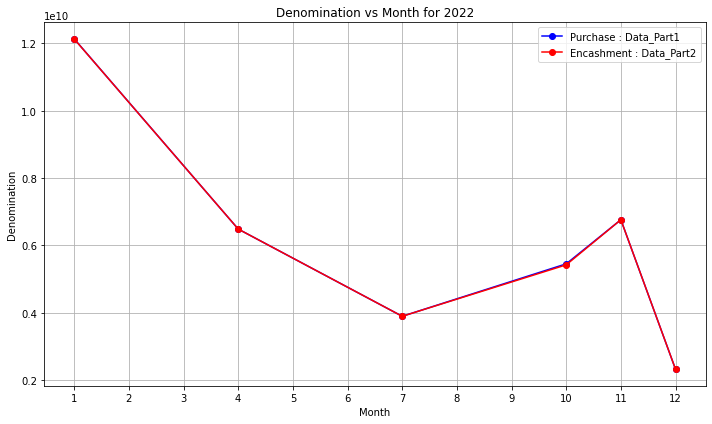

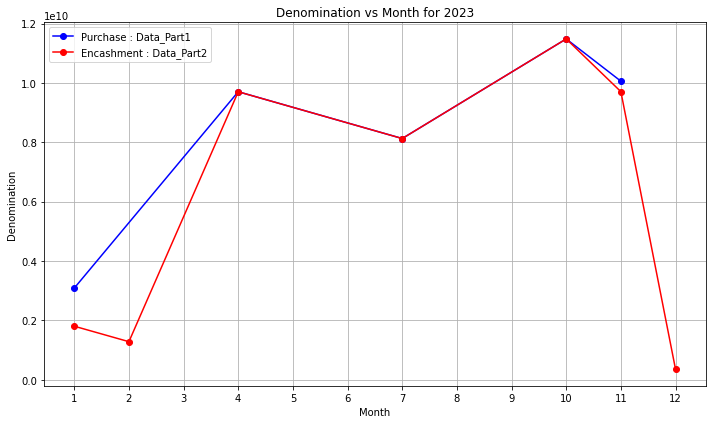

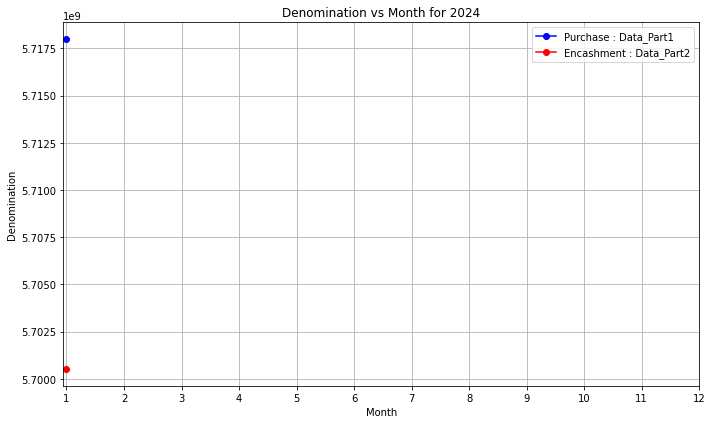

In [65]:
# Convert "Date of Purchase" and "Date of Encashment" to datetime
Data_Part1['Date of Purchase'] = pd.to_datetime(Data_Part1['Date of Purchase'], format='%d/%b/%Y')
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Extract year and month from the date for both datasets
Data_Part1['Year'] = Data_Part1['Date of Purchase'].dt.year
Data_Part2['Year'] = Data_Part2['Date of Encashment'].dt.year
Data_Part1['Month'] = Data_Part1['Date of Purchase'].dt.month
Data_Part2['Month'] = Data_Part2['Date of Encashment'].dt.month

# Iterate over each year and create a separate plot for each year
for year in range(2019, 2025):
    # Filter data for the current year
    data_part1_year = Data_Part1[Data_Part1['Year'] == year]
    data_part2_year = Data_Part2[Data_Part2['Year'] == year]

    # Group by month and sum the denominations for both datasets
    denomination_by_month_data1 = data_part1_year.groupby('Month')['Denomination'].sum()
    denomination_by_month_data2 = data_part2_year.groupby('Month')['Denomination'].sum()

    # Plot the denominations for each month
    plt.figure(figsize=(10, 6))
    plt.plot(denomination_by_month_data1.index, denomination_by_month_data1.values, marker='o', linestyle='-', color='b', label='Purchase : Data_Part1')
    plt.plot(denomination_by_month_data2.index, denomination_by_month_data2.values, marker='o', linestyle='-', color='r', label='Encashment : Data_Part2')
    plt.title(f'Denomination vs Month for {year}')
    plt.xlabel('Month')
    plt.ylabel('Denomination')
    plt.xticks(range(1, 13))  # Set ticks for all months
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [66]:
# Convert "Date of Encashment" to datetime
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Extract year and month from the date for Data_Part2
Data_Part2['Year'] = Data_Part2['Date of Encashment'].dt.year
Data_Part2['Month'] = Data_Part2['Date of Encashment'].dt.month

# Filter data for the period from 2019 to 2023
encashment_data_2019_2023 = Data_Part2[(Data_Part2['Year'] >= 2019) & (Data_Part2['Year'] <= 2023)]

# Group by year and month and sum the encashment amounts
encashment_by_month = encashment_data_2019_2023.groupby(['Year', 'Month'])['Denomination'].sum() / 1e7  # Convert to crores

# Iterate over each year and create a separate plot for each year
for year in range(2019, 2024):
    # Filter data for the current year
    encashment_year = encashment_by_month.loc[year]

    # Plot the encashment trend for the current year
    plt.figure(figsize=(10, 6))
    plt.plot(encashment_year.index, encashment_year.values, marker='o', linestyle='-', color='b')
    plt.title(f'Encashment Trend for {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Encashment (Cr)')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


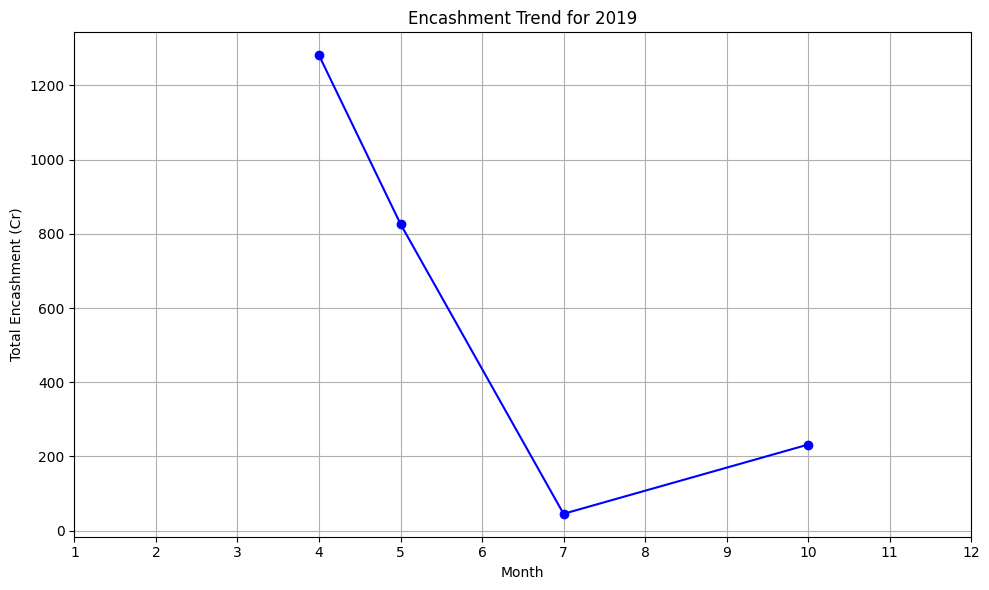

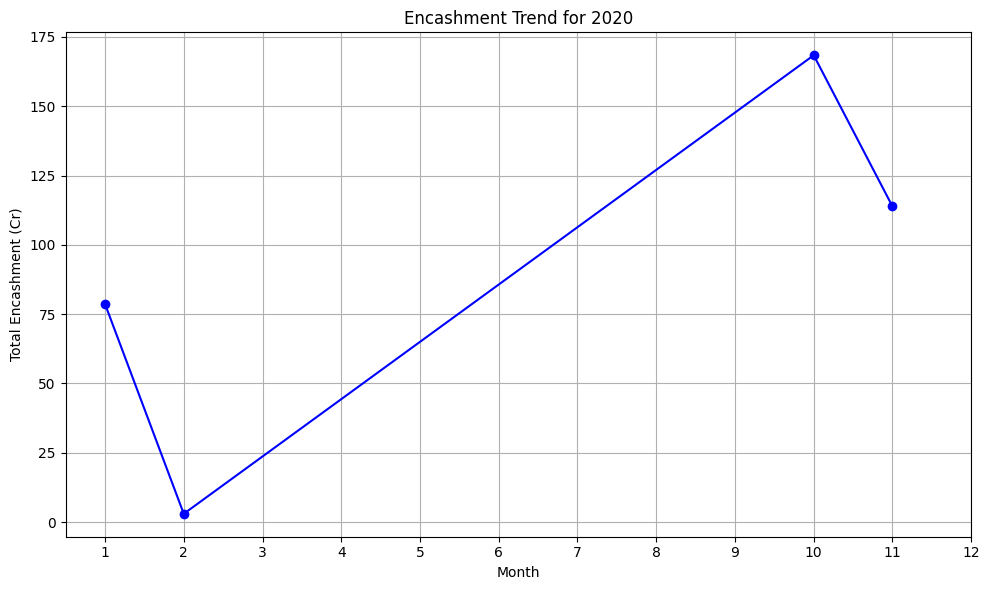

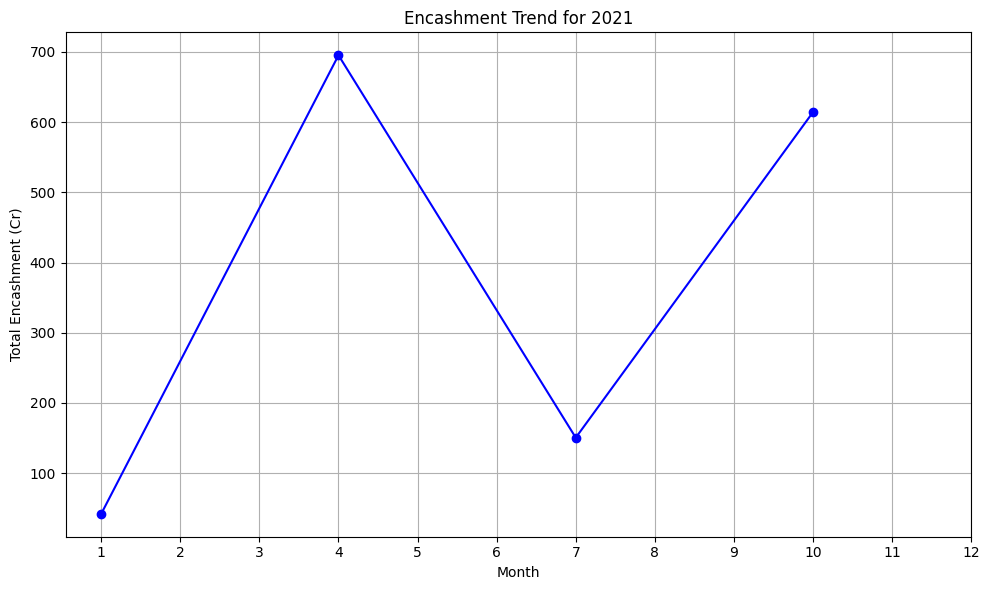

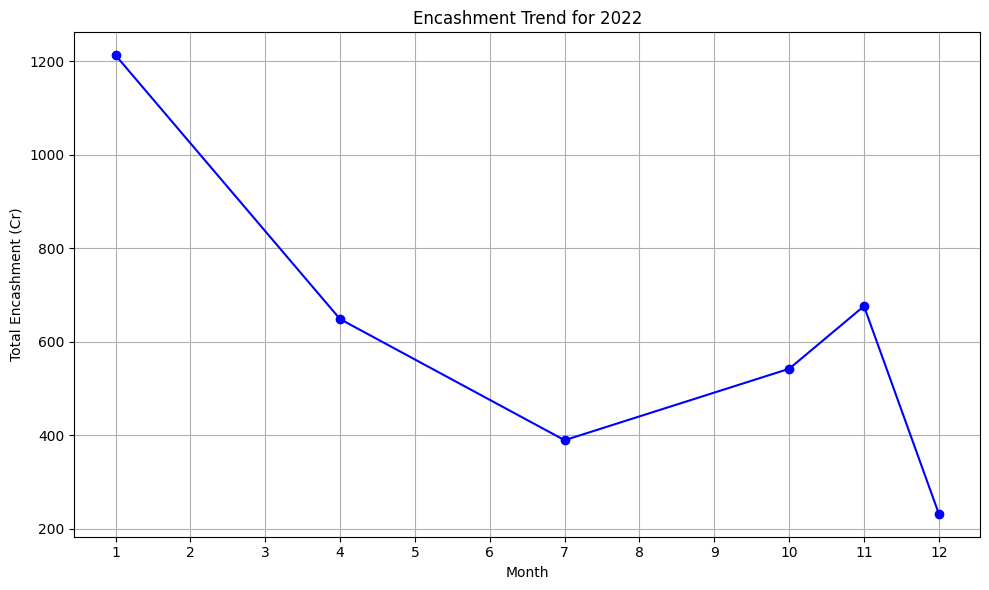

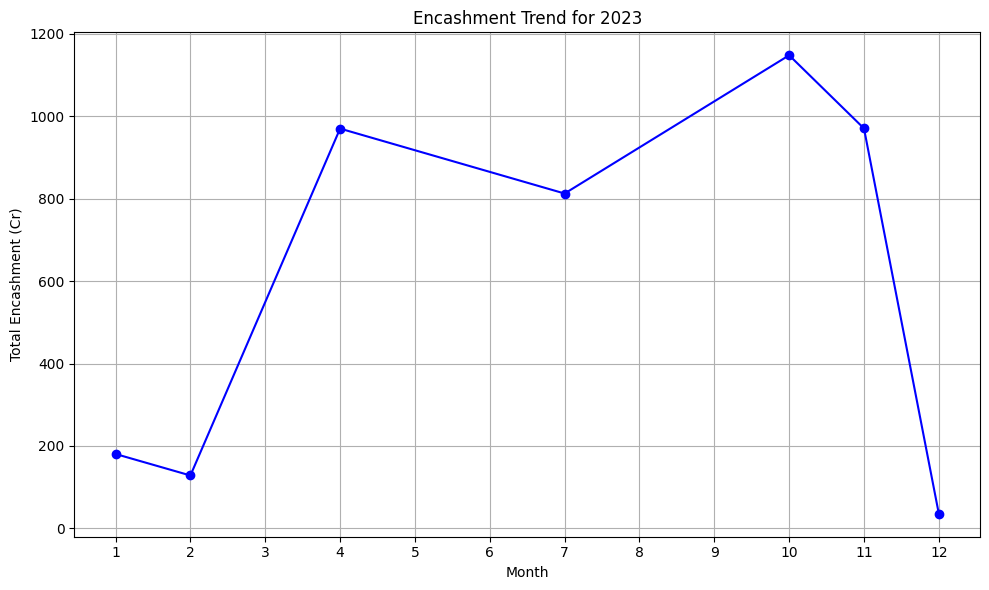

In [ ]:
# Convert "Date of Encashment" to datetime
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Extract year and month from the date for Data_Part2
Data_Part2['Year'] = Data_Part2['Date of Encashment'].dt.year
Data_Part2['Month'] = Data_Part2['Date of Encashment'].dt.month

# Filter data for the period from 2019 to 2023
encashment_data_2019_2023 = Data_Part2[(Data_Part2['Year'] >= 2019) & (Data_Part2['Year'] <= 2023)]

# Group by year and month and sum the encashment amounts
encashment_by_month = encashment_data_2019_2023.groupby(['Year', 'Month'])['Denomination'].sum() / 1e7  # Convert to crores

# Iterate over each year and create a separate plot for each year
for year in range(2019, 2024):
    # Filter data for the current year
    encashment_year = encashment_by_month.loc[year]

    # Plot the encashment trend for the current year
    plt.figure(figsize=(10, 6))
    plt.plot(encashment_year.index, encashment_year.values, marker='o', linestyle='-', color='b')
    plt.title(f'Encashment Trend for {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Encashment (Cr)')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


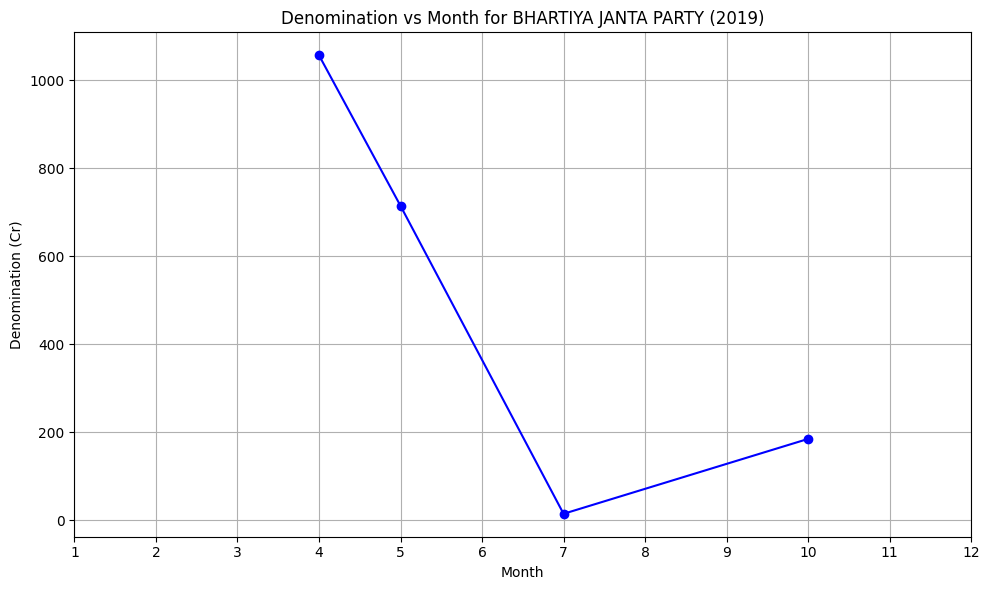

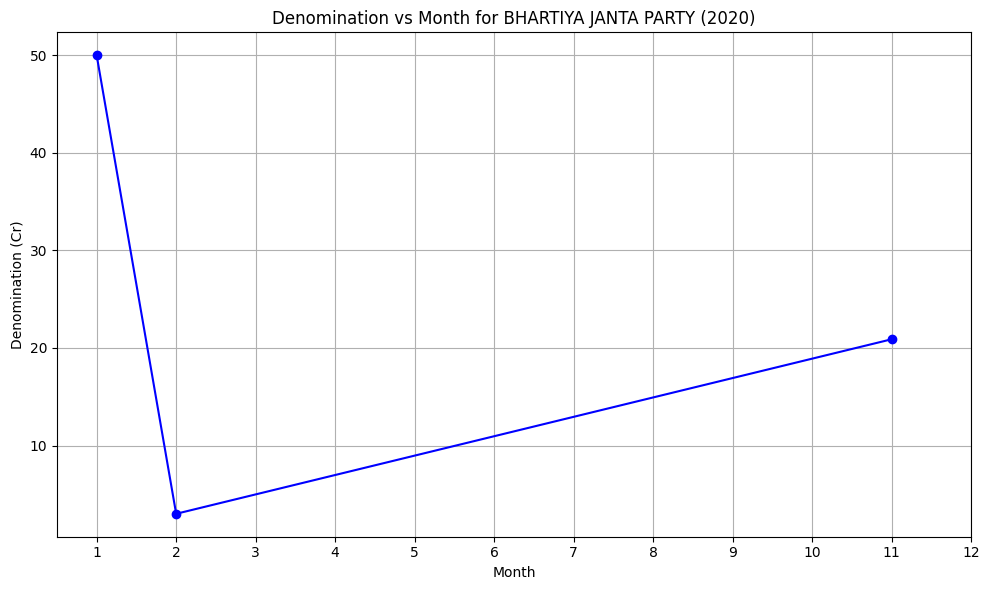

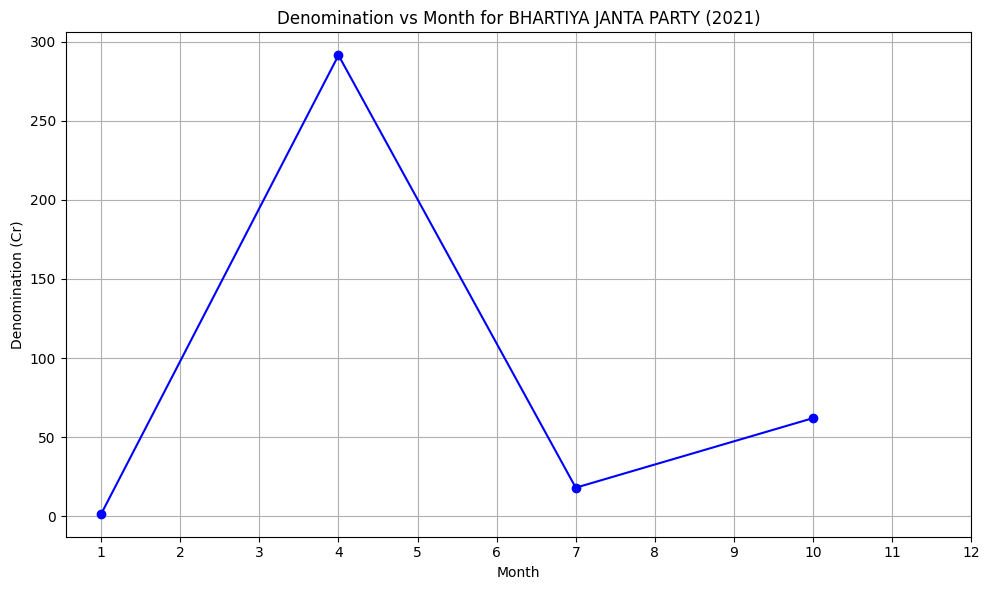

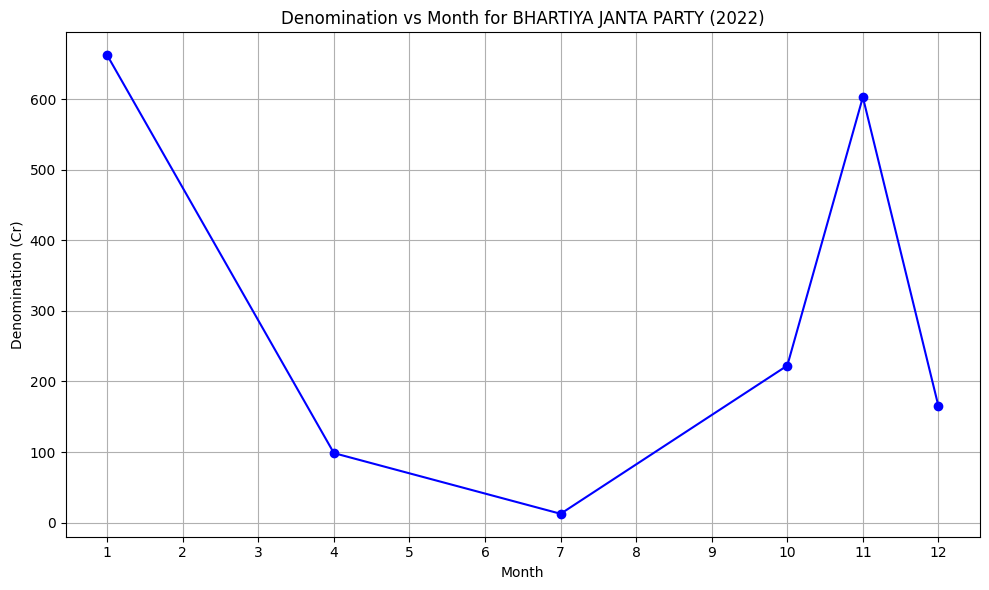

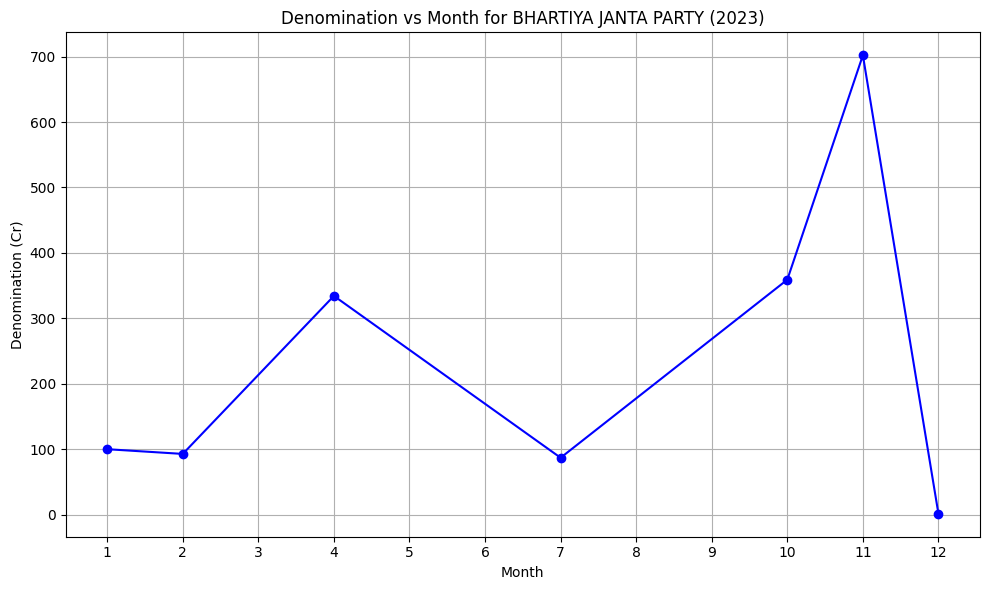

In [ ]:
# Convert "Date of Encashment" to datetime
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Extract year and month from the date for Data_Part2
Data_Part2['Year'] = Data_Part2['Date of Encashment'].dt.year
Data_Part2['Month'] = Data_Part2['Date of Encashment'].dt.month

# Filter data for "BHARTIYA JANTA PARTY"
bjp_data_part2 = Data_Part2[Data_Part2['Name of the Political Party'] == 'BHARTIYA JANTA PARTY']

# Group by year and month and sum the denominations
denomination_by_year_month_bjp = bjp_data_part2.groupby(['Year', 'Month'])['Denomination'].sum() / 1e7  # Convert to crores

# Iterate over each year and create a separate plot for each year
for year in range(2019, 2024):
    # Filter data for the current year
    bjp_data_year = denomination_by_year_month_bjp.loc[year]

    # Plot the encashment trend for the current year
    plt.figure(figsize=(10, 6))
    plt.plot(bjp_data_year.index.get_level_values('Month'), bjp_data_year.values, marker='o', linestyle='-', color='b')
    plt.title(f'Denomination vs Month for BHARTIYA JANTA PARTY ({year})')
    plt.xlabel('Month')
    plt.ylabel('Denomination (Cr)')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


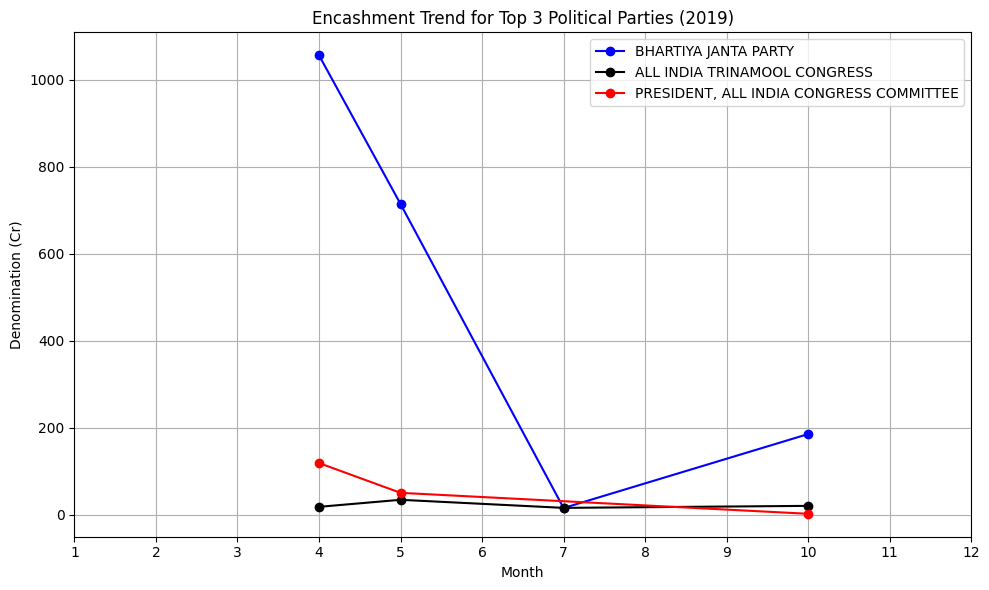

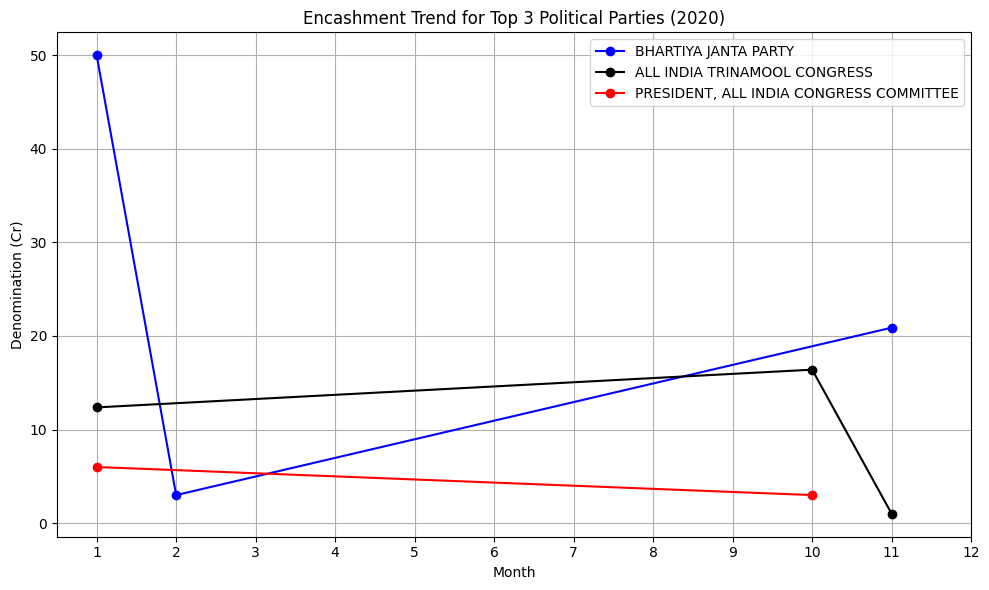

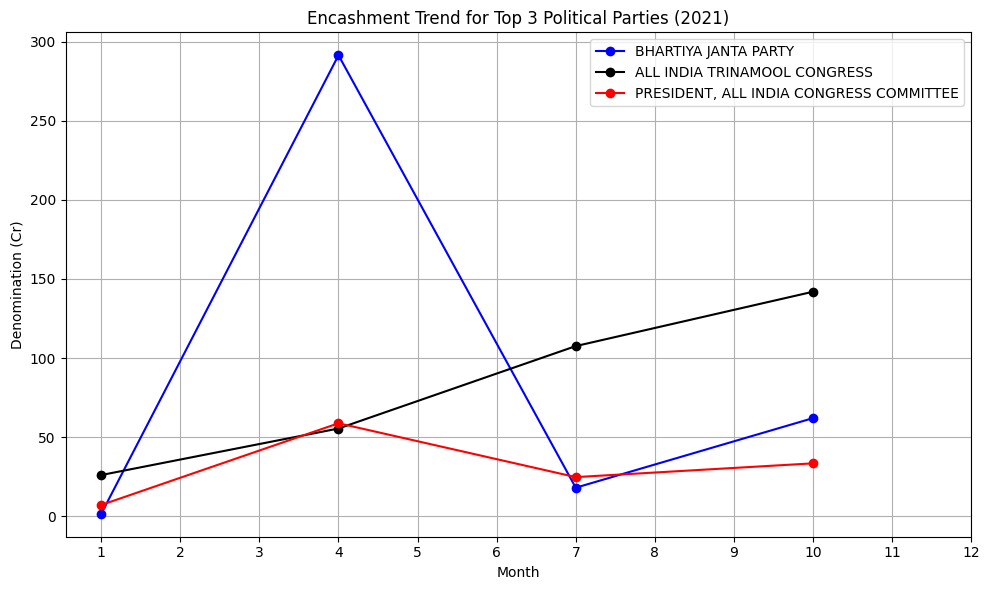

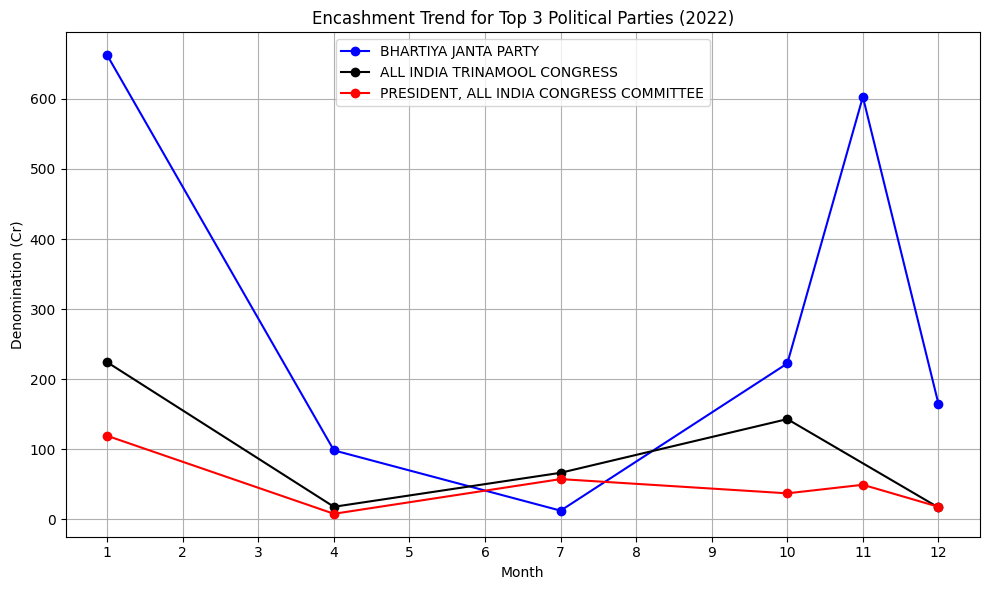

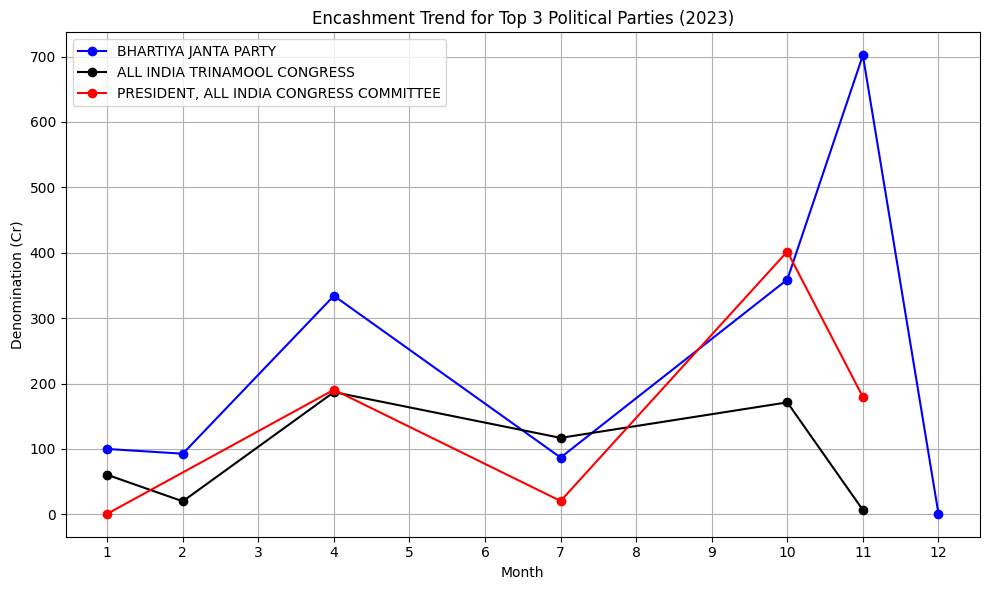

In [ ]:
# Convert "Date of Encashment" to datetime
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Extract year and month from the date for Data_Part2
Data_Part2['Year'] = Data_Part2['Date of Encashment'].dt.year
Data_Part2['Month'] = Data_Part2['Date of Encashment'].dt.month

# Group by political party and sum the denominations
denomination_by_party_year_month = Data_Part2.groupby(['Name of the Political Party', 'Year', 'Month'])['Denomination'].sum() / 1e7  # Convert to crores

# Get the top three political parties
top_parties = denomination_by_party_year_month.groupby('Name of the Political Party').sum().nlargest(3).index.tolist()

# Define colors for each party
colors = ['blue', 'black', 'red']

# Iterate over each year and create a separate plot for each
for year in range(2019, 2024):
    # Create a figure and axis object for the current year
    fig, ax = plt.subplots(figsize=(10, 6))

    # Iterate over each party and plot their encashment trend for the current year
    for party, color in zip(top_parties, colors):
        # Filter data for the current party and year
        party_year_data = denomination_by_party_year_month.loc[(party, year)]

        # Plot the encashment trend for the current party and year
        ax.plot(party_year_data.index.get_level_values('Month'), party_year_data.values, marker='o', linestyle='-', color=color, label=party)

    # Set plot title, labels, and legend for the current year
    ax.set_title(f'Encashment Trend for Top 3 Political Parties ({year})')
    ax.set_xlabel('Month')
    ax.set_ylabel('Denomination (Cr)')
    ax.set_xticks(range(1, 13))
    ax.grid(True)
    ax.legend()

    # Show the plot for the current year
    plt.tight_layout()
    plt.show()


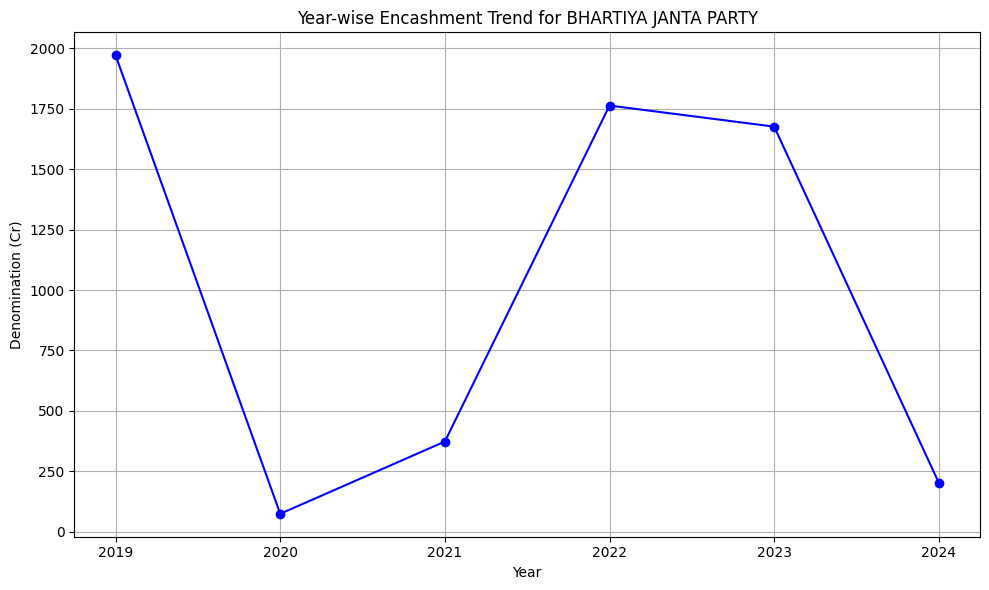

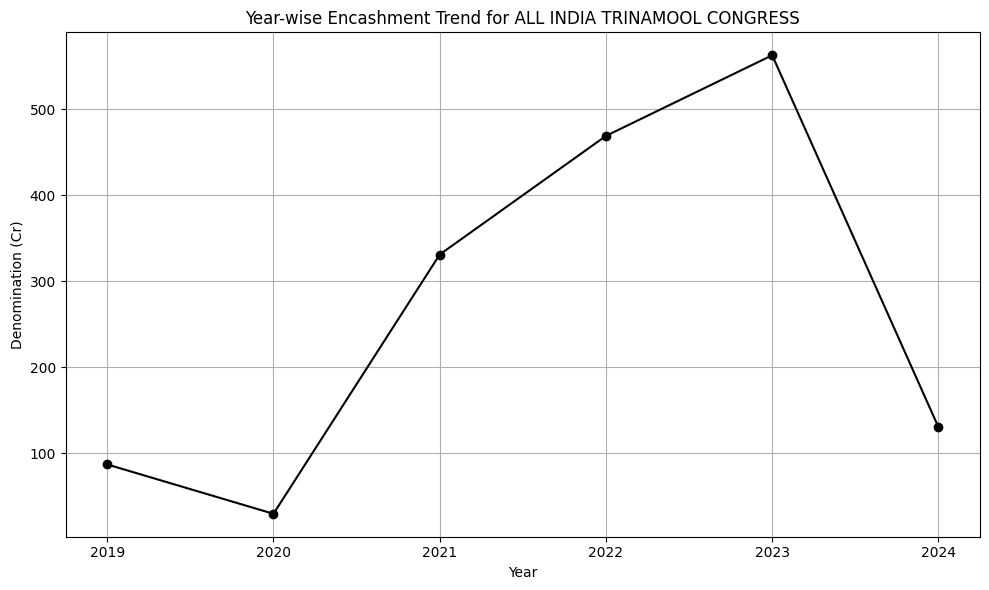

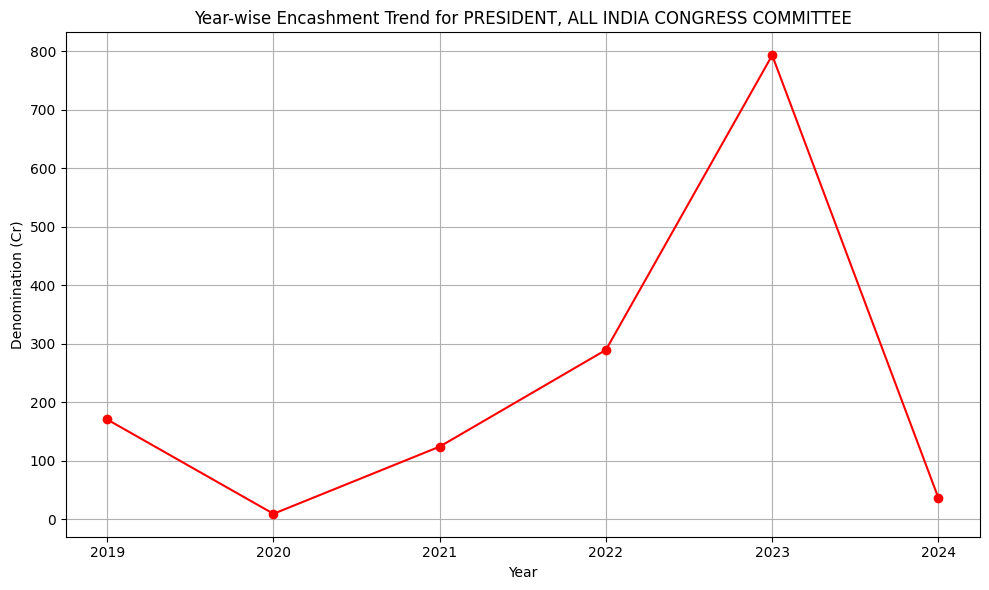

In [ ]:
# Convert "Date of Encashment" to datetime
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Extract year from the date for Data_Part2
Data_Part2['Year'] = Data_Part2['Date of Encashment'].dt.year

# Group by political party and year and sum the denominations
denomination_by_party_year = Data_Part2.groupby(['Name of the Political Party', 'Year'])['Denomination'].sum() / 1e7  # Convert to crores

# Get the top three political parties
top_parties = denomination_by_party_year.groupby('Name of the Political Party').sum().nlargest(3).index.tolist()

# Define colors for each party
colors = ['blue', 'black', 'red']

# Iterate over each party and create a separate plot for each
for party, color in zip(top_parties, colors):
    # Filter data for the current party
    party_data = denomination_by_party_year.loc[party]

    # Plot the encashment trend for the current party
    plt.figure(figsize=(10, 6))
    plt.plot(party_data.index, party_data.values, marker='o', linestyle='-', color=color)

    # Set plot title, labels, and legend for the current party
    plt.title(f'Year-wise Encashment Trend for {party}')
    plt.xlabel('Year')
    plt.ylabel('Denomination (Cr)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


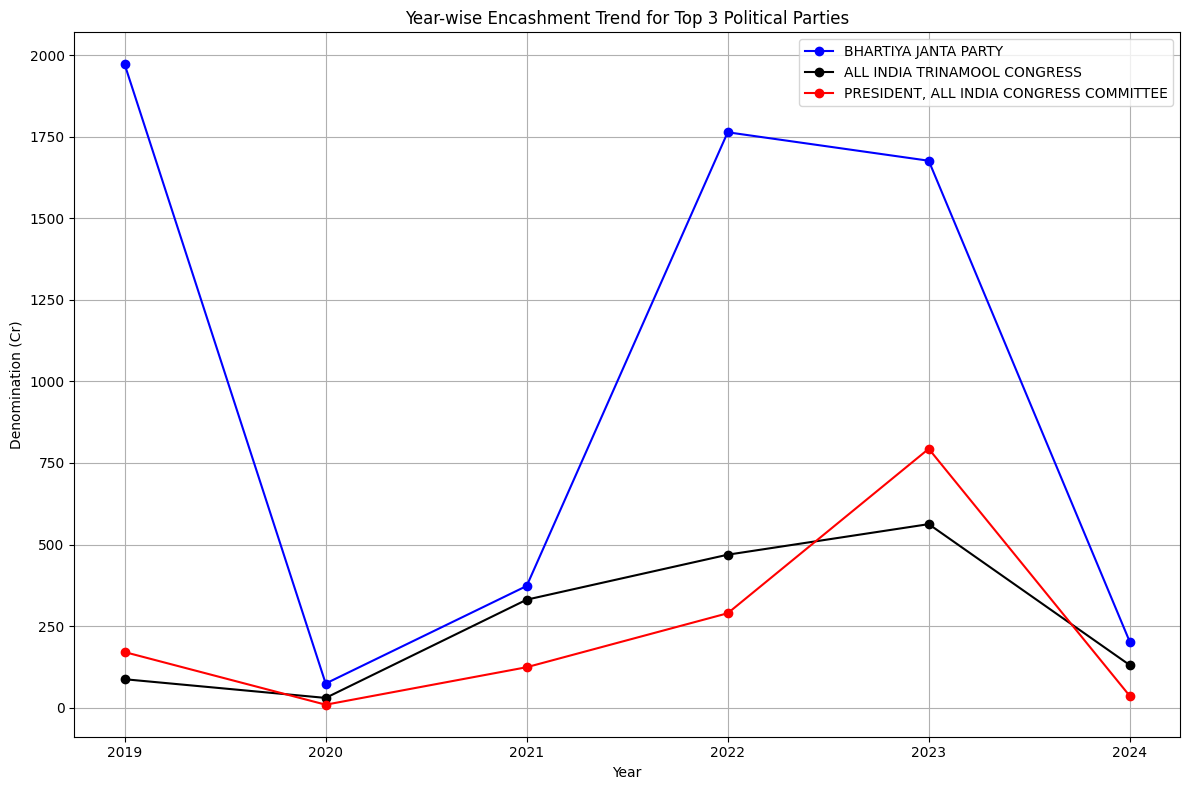

In [ ]:
# Convert "Date of Encashment" to datetime
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Extract year from the date for Data_Part2
Data_Part2['Year'] = Data_Part2['Date of Encashment'].dt.year

# Group by political party and year and sum the denominations
denomination_by_party_year = Data_Part2.groupby(['Name of the Political Party', 'Year'])['Denomination'].sum() / 1e7  # Convert to crores

# Get the top three political parties
top_parties = denomination_by_party_year.groupby('Name of the Political Party').sum().nlargest(3).index.tolist()

# Define colors for each party
colors = ['blue', 'black', 'red']

# Plot the year-wise sum of encashment for each party
plt.figure(figsize=(12, 8))
for party, color in zip(top_parties, colors):
    # Filter data for the current party
    party_data = denomination_by_party_year.loc[party]

    # Plot the encashment trend for the current party
    plt.plot(party_data.index, party_data.values, marker='o', linestyle='-', color=color, label=party)

# Set plot title, labels, and legend
plt.title('Year-wise Encashment Trend for Top 3 Political Parties')
plt.xlabel('Year')
plt.ylabel('Denomination (Cr)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


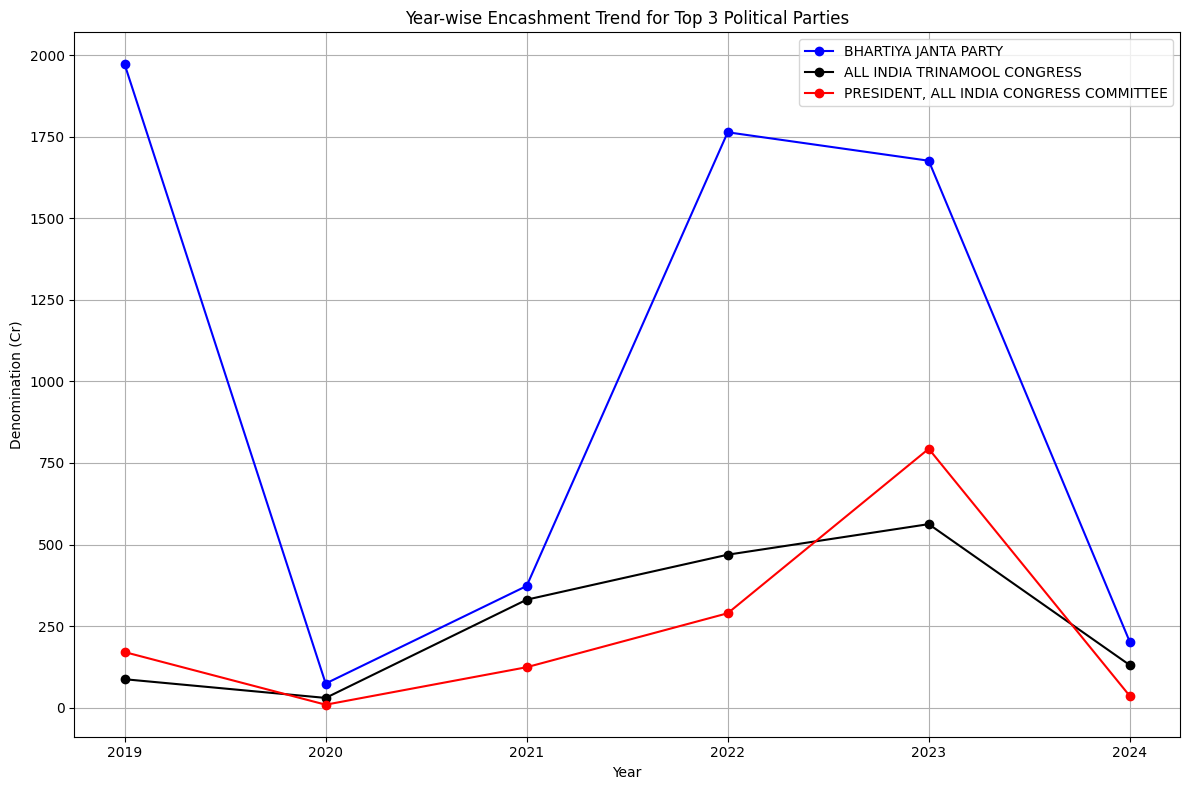

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert "Date of Encashment" to datetime
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Extract year from the date for Data_Part2
Data_Part2['Year'] = Data_Part2['Date of Encashment'].dt.year

# Group by political party and year and sum the denominations
denomination_by_party_year = Data_Part2.groupby(['Name of the Political Party', 'Year'])['Denomination'].sum() / 1e7  # Convert to crores

# Get the top three political parties
top_parties = denomination_by_party_year.groupby('Name of the Political Party').sum().nlargest(3).index.tolist()

# Define colors for each party
colors = ['blue', 'black', 'red']

# Plot the year-wise sum of encashment for each party
plt.figure(figsize=(12, 8))
for party, color in zip(top_parties, colors):
    # Filter data for the current party
    party_data = denomination_by_party_year.loc[party]

    # Plot the encashment trend for the current party
    plt.plot(party_data.index, party_data.values, marker='o', linestyle='-', color=color, label=party)

# Set plot title, labels, and legend
plt.title('Year-wise Encashment Trend for Top 3 Political Parties')
plt.xlabel('Year')
plt.ylabel('Denomination (Cr)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Convert "Date of Encashment" to datetime
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Extract year from the date for Data_Part2
Data_Part2['Year'] = Data_Part2['Date of Encashment'].dt.year

# Group by political party and year and sum the denominations
denomination_by_party_year = Data_Part2.groupby(['Name of the Political Party', 'Year'])['Denomination'].sum() / 1e7  # Convert to crores

# Get the top three political parties
top_parties = denomination_by_party_year.groupby('Name of the Political Party').sum().nlargest(3).index.tolist()

# Filter data for the top 3 parties
top_parties_data = Data_Part2[Data_Part2['Name of the Political Party'].isin(top_parties)]

# Filter data for the years 2019 to 2023
years_range = range(2019, 2024)
top_parties_data_years = top_parties_data[top_parties_data['Year'].isin(years_range)]

# Group by party and year and sum the denominations
total_encashment_by_party_year = top_parties_data_years.groupby(['Name of the Political Party', 'Year'])['Denomination'].sum()

# Display the result
print(total_encashment_by_party_year)


Name of the Political Party              Year
ALL INDIA TRINAMOOL CONGRESS             2019      870946000
                                         2020      297700000
                                         2021     3309430000
                                         2022     4688000000
                                         2023     5624738000
BHARTIYA JANTA PARTY                     2019    19717501000
                                         2020      738900000
                                         2021     3729950000
                                         2022    17635499000
                                         2023    16763261000
PRESIDENT, ALL INDIA CONGRESS COMMITTEE  2019     1703110000
                                         2020       90000000
                                         2021     1239245000
                                         2022     2893600000
                                         2023     7933700000
Name: Denomination, dtype: int64


<Figure size 2000x1000 with 0 Axes>

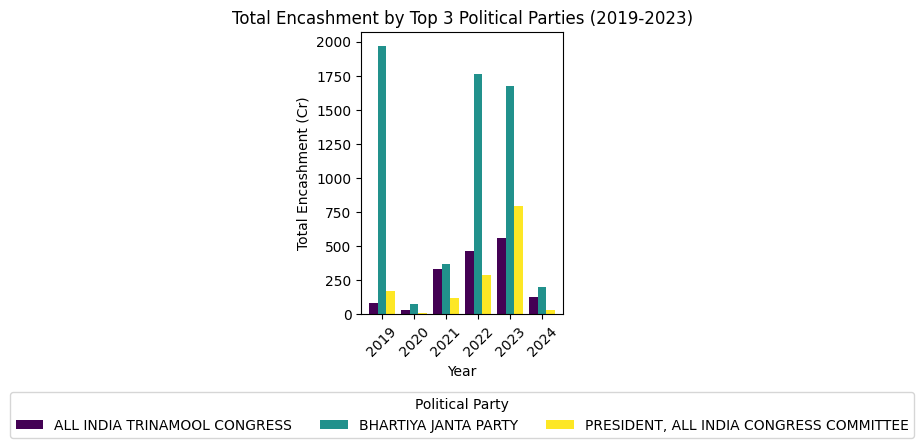

In [ ]:
# Convert "Date of Encashment" to datetime
Data_Part2['Date of Encashment'] = pd.to_datetime(Data_Part2['Date of Encashment'], format='%d/%b/%Y')

# Extract year from the date for Data_Part2
Data_Part2['Year'] = Data_Part2['Date of Encashment'].dt.year

# Group by year and sum the denominations for the top 3 political parties
denomination_by_year = Data_Part2.groupby(['Year', 'Name of the Political Party'])['Denomination'].sum() / 1e7  # Convert to crores

# Get the top three political parties
top_parties = denomination_by_year.groupby('Name of the Political Party').sum().nlargest(3).index.tolist()

# Filter data for the top 3 parties
top_parties_data = Data_Part2[Data_Part2['Name of the Political Party'].isin(top_parties)]

# Group by party and year and sum the denominations
total_encashment_by_year = top_parties_data.groupby(['Year', 'Name of the Political Party'])['Denomination'].sum() / 1e7  # Convert to crores

# Reshape the data for plotting
total_encashment_by_year_unstacked = total_encashment_by_year.unstack()

# Plot the total encashment vs year for the top 3 political parties
plt.figure(figsize=(20, 10))  # Increased figure width
total_encashment_by_year_unstacked.plot(kind='bar', stacked=False, colormap='viridis', width=0.8)  # Adjust width here
plt.title('Total Encashment by Top 3 Political Parties (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Total Encashment (Cr)')
plt.xticks(rotation=45)
plt.legend(title='Political Party', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=len(top_parties))
plt.tight_layout()
plt.show()
